In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
from io import BytesIO
import seaborn as sns
from sklearn.model_selection import train_test_split

from keras.layers.core import Dense
from keras.layers import Dropout
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import SGD,Adam,RMSprop
import keras_tuner as kt
# Image manipulation.
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

#1-data reading and description

In [8]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
df=pd.read_csv('train.csv',index_col='id')
df.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [10]:
df.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


#2-checking data for null values and duplicates

In [11]:
df.isnull().sum()

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [12]:
df.duplicated().sum()

0

looks like the data is clean

In [13]:
df["species"].value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

#3-Image Drawing

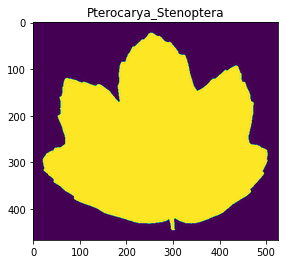

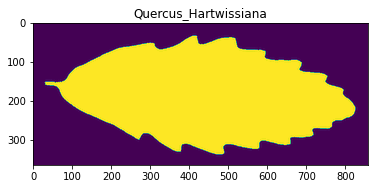

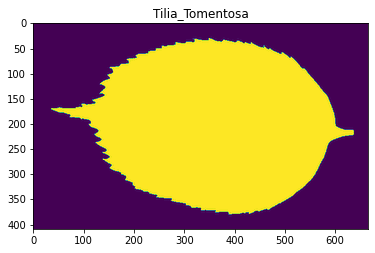

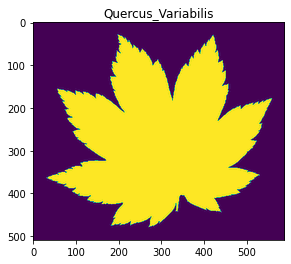

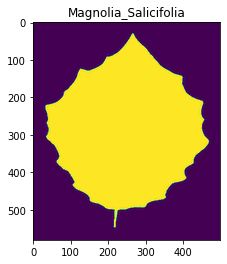

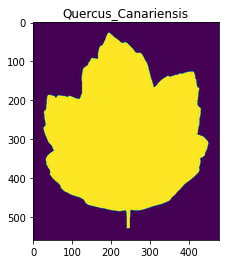

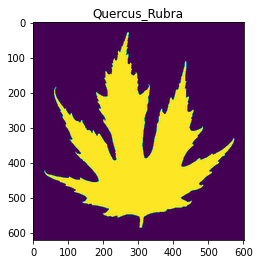

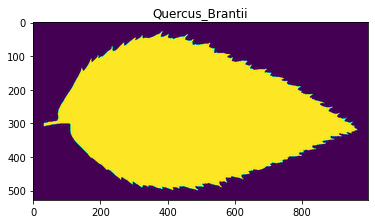

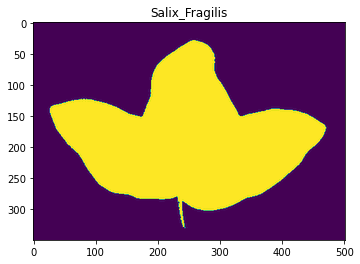

In [14]:
zippedImgs = zipfile.ZipFile("images.zip")
inflist = zippedImgs.infolist()

for i in range(10):
    
    file_in_zip = zippedImgs.namelist()[i]
    if (".jpg" in file_in_zip or ".JPG" in file_in_zip):
       
        data = zippedImgs.read(file_in_zip)
        dataEnc = BytesIO(data)
        img = Image.open(dataEnc)

        plt.imshow(img, interpolation='lanczos')
        plt.title(df.loc[df.index[i], 'species'])
        plt.show()


#4-Data visualization

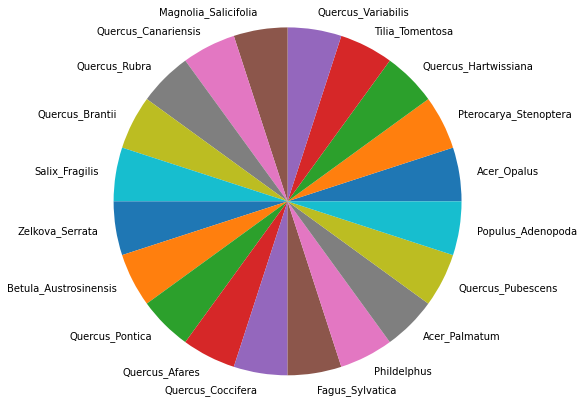

In [15]:
plt.pie(df[:20]['species'].value_counts(),labels=df['species'][:20],radius=2);


In [16]:
data_cor=df.drop(columns=['species'])  # Create a new dataframe by dropping the 'species' column from the original dataframe

In [17]:
df.corr().style.background_gradient(cmap="RdBu_r")
df["species"] =df.groupby("species", sort=False).ngroup()

<Axes: >

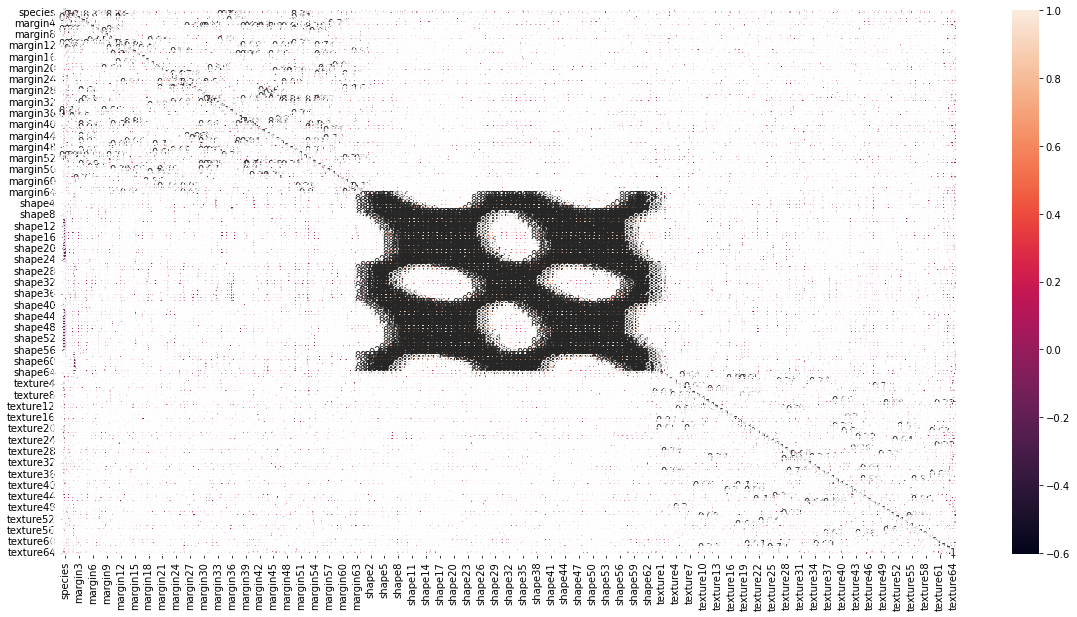

In [18]:
plt.figure(figsize=(20, 10)) # Set the size of the figure for displaying the heatmap 
sns.heatmap(df.corr(), annot=True) # Create a heatmap of the correlation between the columns in the dataframe, with annotations for each cell

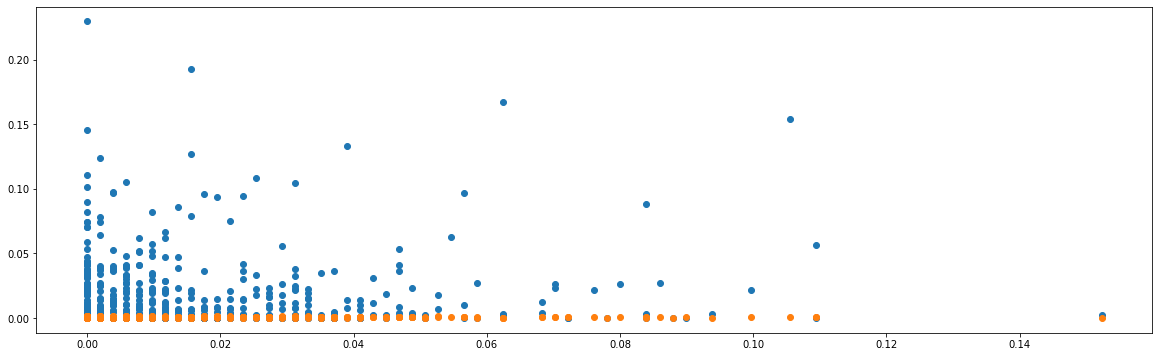

In [19]:
#split columns to three parts(margin,shape,texture) to visualize it and calculate correlation
data_marg=data_cor.iloc[:,:64] # Create a dataframe 'data_marg' containing the columns for margin features
data_texture=data_cor.iloc[:,64:128] # Create a dataframe 'data_texture' containing the columns for texture features
data_shape=data_cor.iloc[:,128:] # Create a dataframe 'data_shape' containing the columns for shape features
plt.figure(figsize=(20,6))
plt.scatter(x=data_marg[1:10],y=data_shape[1:10])
plt.scatter(x=data_marg[1:10],y=data_texture[1:10])
 # Create a scatter plot of the first 10 rows of margin and texture features

plt.show() # Show the scatter plots

In [20]:
x=df.drop('species',axis = 1)
y=df["species"]
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=df["species"],test_size = 0.2,random_state=1)

In [21]:
print(X_train.shape,y_train.shape,X_test.shape)

(792, 192) (792,) (198, 192)


#5-Hyper parameter Tuning and Model building

In [22]:
keras.backend.clear_session() 
"""helper function for model tuning"""

def model_tune(new):
  """Hyper parameters"""

    #learning rate
  LR = new.Float('learning_rate',min_value=1e-4,max_value=0.1,sampling='log')

    #hidden units number
  hidden_neurons = new.Int('hidden_units',min_value=32,max_value=512,step=32)

    #dropout rate
  hidden_dropout =  new.Float('hidden_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05)

    #l1 reguralization
  l1_penalty_hidden = new.Float('l1_penalty_hidden',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)

    #l2 reguralization
  l2_penalty_hidden = new.Float('l2_penalty_hidden',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)

    #l2 reguralization for hidden layer bias
  l2_penalty_hidden_bias = new.Float('l2_penalty_hidden_bias',min_value=0.0,max_value=0.01,default=0.0,step=0.0015)

  """model building"""

  model = keras.Sequential()
    #input
  model.add(Dense(units=hidden_neurons,input_dim=192,kernel_regularizer=regularizers.l1_l2(l1=l1_penalty_hidden, l2=l2_penalty_hidden),
                  bias_regularizer=regularizers.l2(l2_penalty_hidden_bias), activation='tanh'))

    #dropout
  model.add(Dropout(rate = hidden_dropout))
    #output
  model.add(Dense(99, activation='softmax'))
  optimizer = Adam(learning_rate=LR)
    

  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.build(X_train.shape)
  print(model.summary())
  return model

In [23]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

tuner = kt.Hyperband(model_tune,objective='val_accuracy',max_epochs=300,overwrite = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                6176      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 99)                3267      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
tuner.search(X_train, y_train, epochs=300, validation_data=(X_test,y_test), use_multiprocessing=True, workers=5, callbacks=[early_stop])

best_hpyper_params=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 725 Complete [00h 00m 03s]
val_accuracy: 0.010101010091602802

Best val_accuracy So Far: 0.9949495196342468
Total elapsed time: 00h 27m 32s


In [25]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0426 summary
Hyperparameters:
learning_rate: 0.019587320081110193
hidden_units: 160
hidden_dropout: 0.45
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.003
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0422
Score: 0.9949495196342468

Trial 0422 summary
Hyperparameters:
learning_rate: 0.019587320081110193
hidden_units: 160
hidden_dropout: 0.45
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.003
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 5
tuner/round: 4
tuner/trial_id: 0411
Score: 0.9898989796638489

Trial 0544 summary
Hyperparameters:
learning_rate: 0.0165188636813054
hidden_units: 224
hidden_dropout: 0.1
l1_penalty_hidden: 0.0
l2_penalty_hidden: 0.0
l2_penalty_hidden_bias: 0.003
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 1
tuner/t

In [54]:
# Get the optimal 12 hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=36)[:]

best_hidden_units = []
best_learning_rates = []
best_hidden_l2 = []
best_hidden_l1 = []
best_hidden_l2_bias = []
best_dropout_rate = []
for i in range(36):
    best_hidden_units.append(best_hps[i].get('hidden_units'))
    best_learning_rates.append(best_hps[i].get('learning_rate'))
    best_hidden_l2.append(best_hps[i].get('l2_penalty_hidden'))
    best_hidden_l1.append(best_hps[i].get('l1_penalty_hidden'))
    best_hidden_l2_bias.append(best_hps[i].get('l2_penalty_hidden_bias'))
    best_dropout_rate.append(best_hps[i].get('hidden_dropout'))
#     best_score.append(best_hps[i].get('Score'))

best_hps = pd.DataFrame({'Learning rate':best_learning_rates, 
                            'Best hidden units number':best_hidden_units,
                            'Best hidden units L2':best_hidden_l2,
                            'Best hidden L1':best_hidden_l1,
                            'Best hidden L2 bias':best_hidden_l2_bias,
                            'Best Dropout Rate':best_dropout_rate})
#                             'Best Score':best_score})

best_hps.drop_duplicates(inplace=True)
best_hps.reset_index(drop=True,inplace=True)
best_hps

,Learning rate,Best hidden units number,Best hidden units L2,Best hidden L1,Best hidden L2 bias,Best Dropout Rate
0,0.019587,160,0.0,0.0,0.0030,0.45
1,0.016519,224,0.0,0.0,0.0030,0.10
2,0.016370,128,0.0,0.0,0.0015,0.35
3,0.006996,512,0.0,0.0,0.0045,0.00
4,0.023062,512,0.0,0.0,0.0060,0.00
5,0.010809,96,0.0,0.0,0.0030,0.10
6,0.031854,512,0.0,0.0,0.0090,0.05
7,0.023469,32,0.0,0.0,0.0000,0.45
8,0.068585,64,0.0,0.0,0.0000,0.40
9,0.006447,128,0.0,0.0,0.0045,0.45


In [55]:
def build_model(best_values):

    keras.backend.clear_session()
    ANN = Sequential()
    ANN.add(Dense(units=best_values[1],input_dim=X_train.shape[1],kernel_regularizer=regularizers.l1_l2(l1=best_values[3], l2=best_values[2]),bias_regularizer=regularizers.l2(best_values[4]), activation='tanh'))
    ANN.add(Dropout(rate = best_values[5]))
    ANN.add(Dense(99, activation='softmax'))
    optimizer = Adam(learning_rate=best_values[0])
    ANN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    ANN.build(X_train.shape)
    return ANN

In [36]:
def train_all_models(models):

    early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
    for i in range(len(models)):
        keras.backend.clear_session()
        history = models[i].fit(X_train, y_train, epochs=300,batch_size = 64, validation_data=(X_test,y_test),callbacks=[early_stop],verbose = 0)
        val_loss_per_epoch = history.history['val_loss']
        loss_per_epoch = history.history['loss']
        val_accuracy_per_epoch = history.history['val_accuracy']
        accuracy_per_epoch = history.history['accuracy']
        plt.figure(figsize=(8,8))
        plt.title(f"model number {i+1} training loss & validation")
        plt.xlabel('epoch')
        plt.ylabel('loss function')
        plt.plot(np.arange(1,len(val_loss_per_epoch)+1),val_loss_per_epoch,label="validation loss")
        plt.plot(np.arange(1,len(loss_per_epoch)+1),loss_per_epoch,label = "training loss")
        plt.legend(loc="upper left")
        plt.show()
        plt.figure(figsize=(8,8))
        plt.title(f"model number {i+1} training accuracy & validation accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.plot(np.arange(1,len(val_accuracy_per_epoch)+1),val_accuracy_per_epoch,label="validation accuracy")
        plt.plot(np.arange(1,len(accuracy_per_epoch)+1),accuracy_per_epoch,label = "training accuracy")
        plt.legend(loc="upper left")
        plt.show()

In [28]:
def evaluate_model(models,X_tr,X_val,y_tr,y_val):
    training_loss = []
    validation_loss =[]
    training_accuracy = []
    validation_accuracy = []
    #get the training and validation loss/accuracy for best 12 models
    for i in range(len(models)):
        keras.backend.clear_session()
        training_accuracy.append(models[i].evaluate(X_tr, y_tr)[0])
        validation_accuracy.append(models[i].evaluate(X_val,y_val)[0])
    return training_loss, validation_loss, training_accuracy, validation_accuracy

In [56]:
def createBest_12Models(best_hyperparameters):
    models = []
    for i in range(len(best_hyperparameters)):
        models.append(build_model(best_hyperparameters.iloc[i]))
    return models

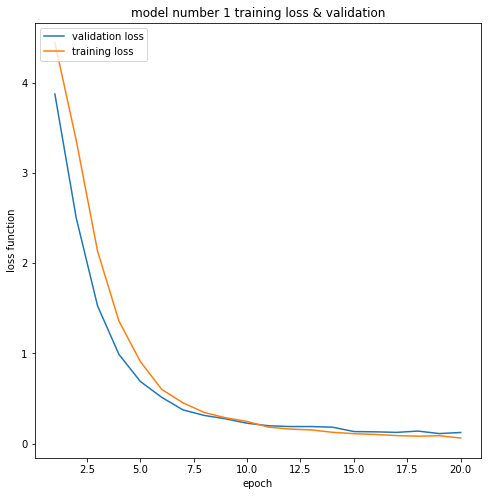

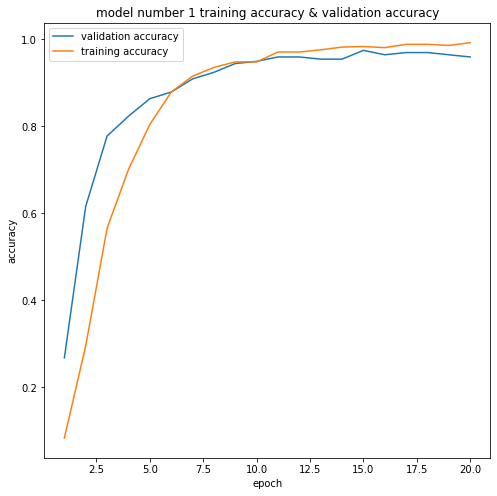

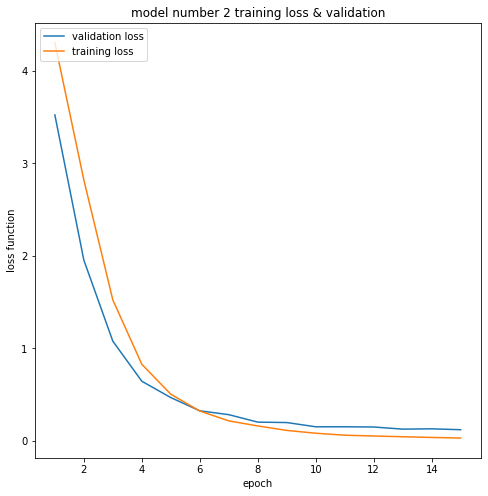

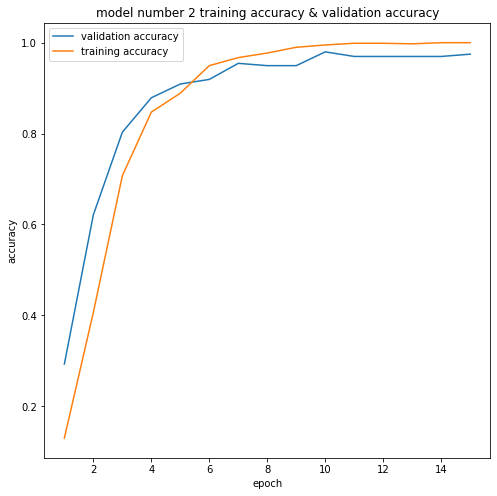

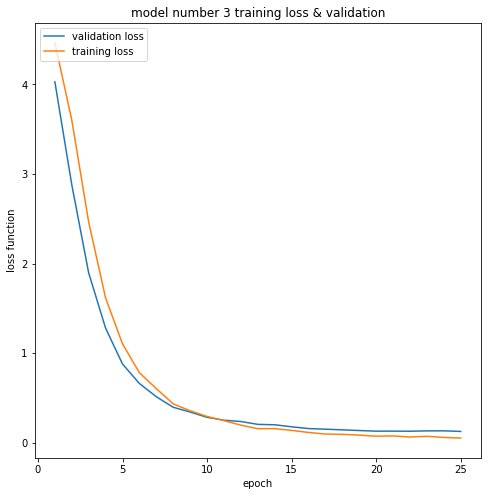

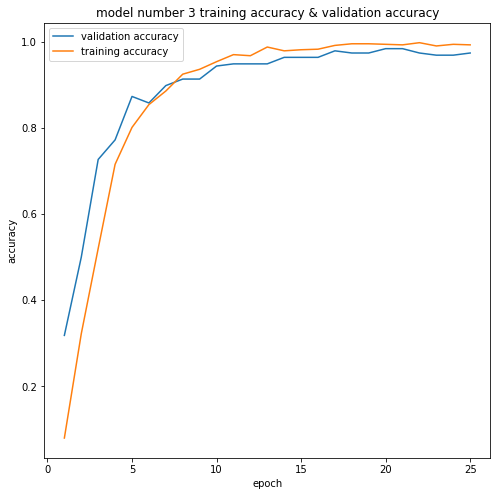

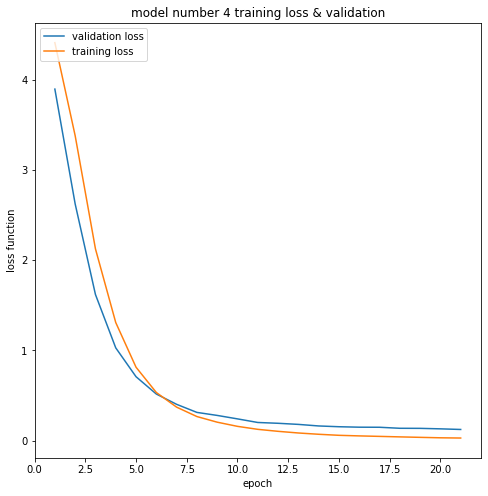

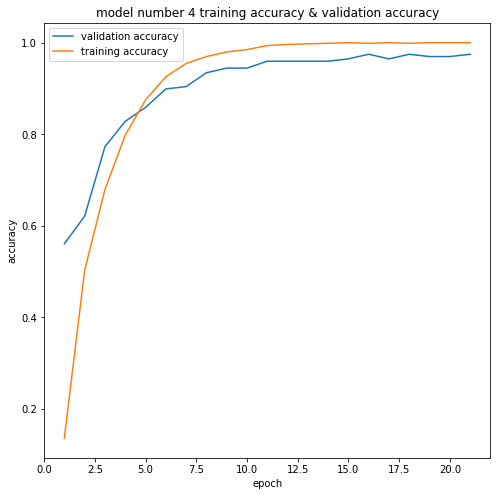

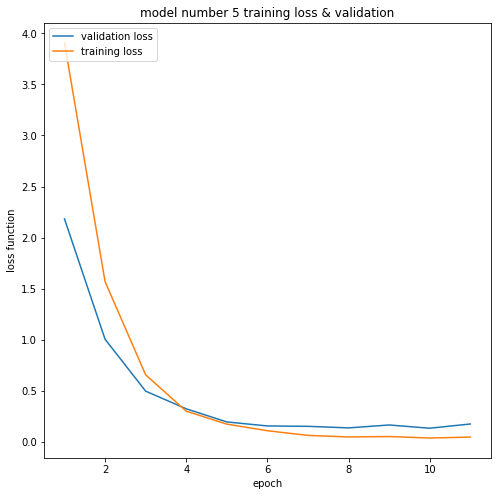

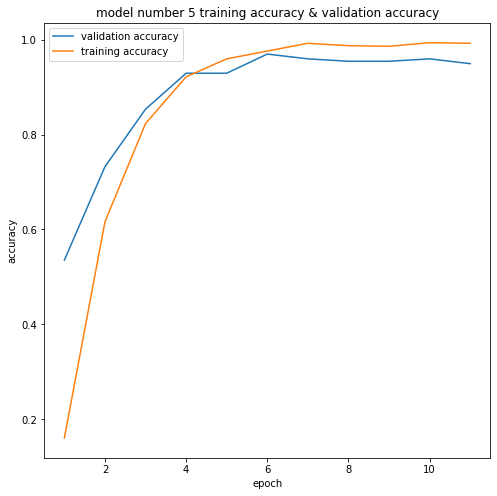

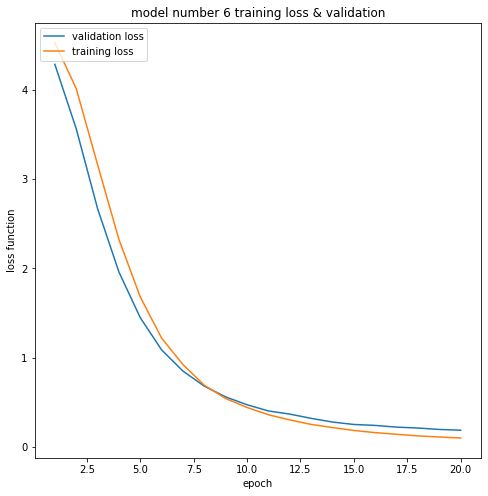

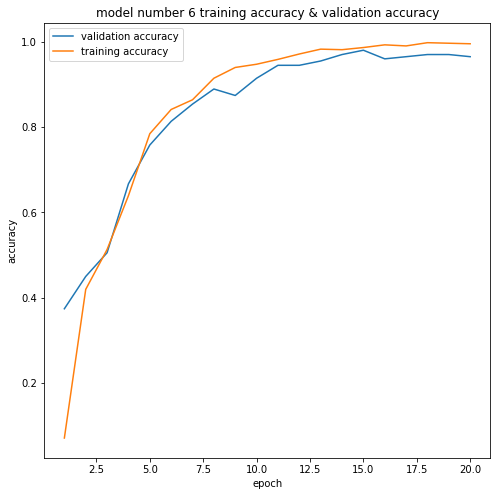

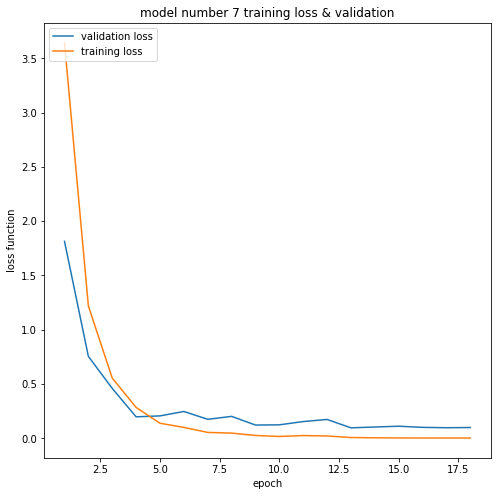

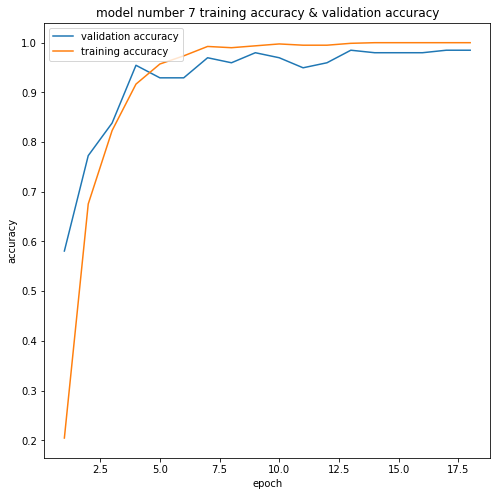

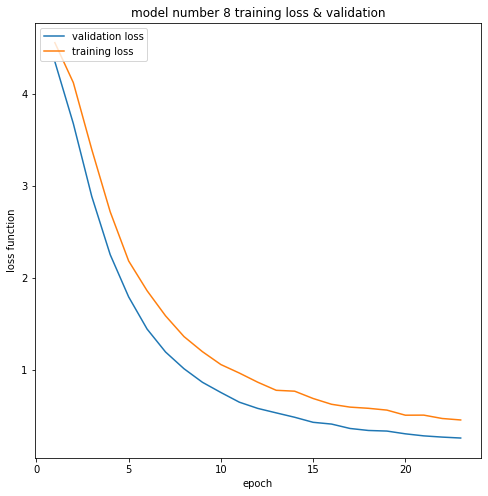

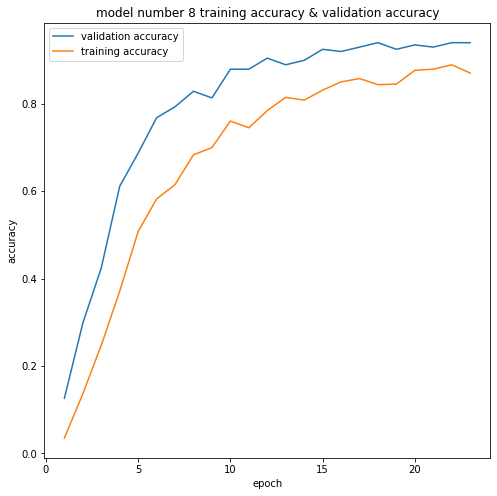

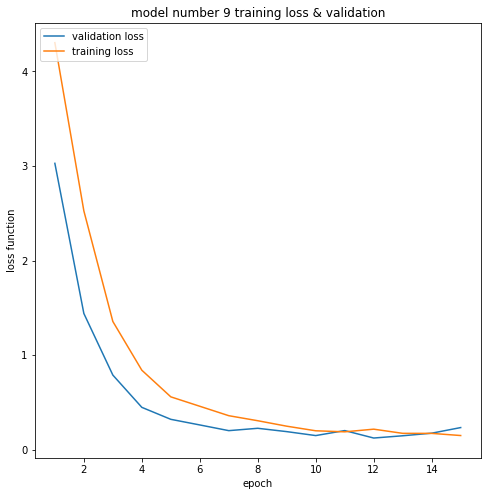

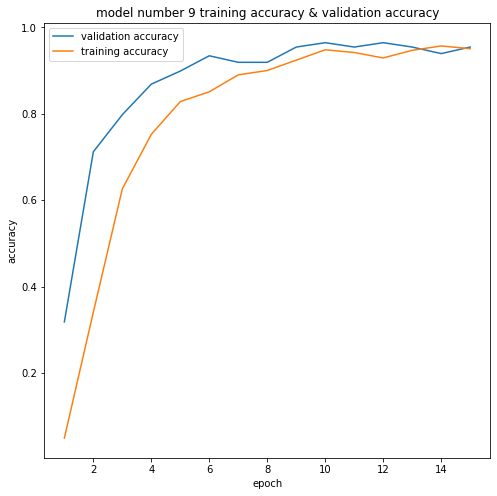

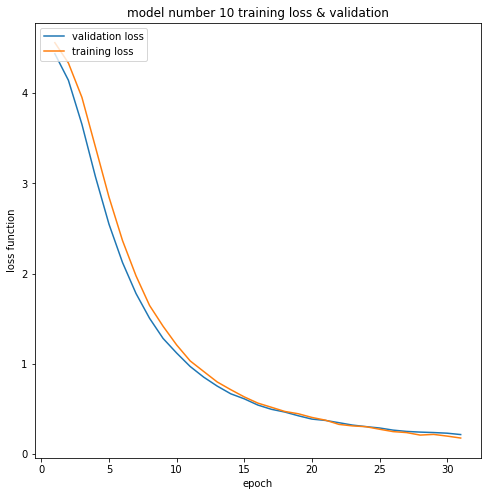

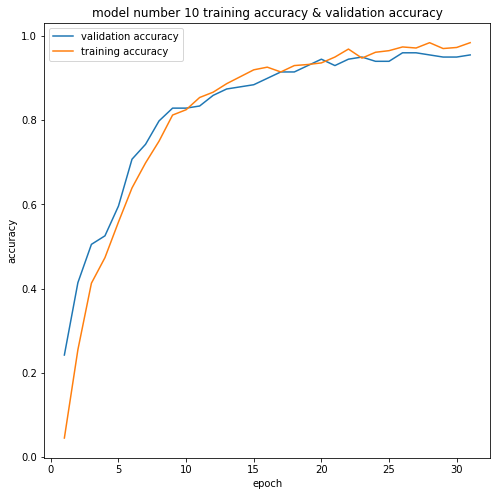

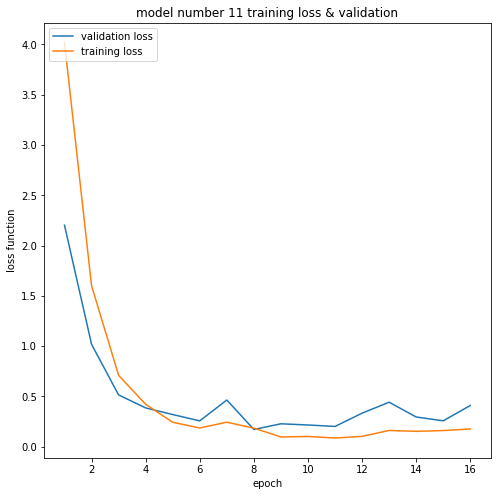

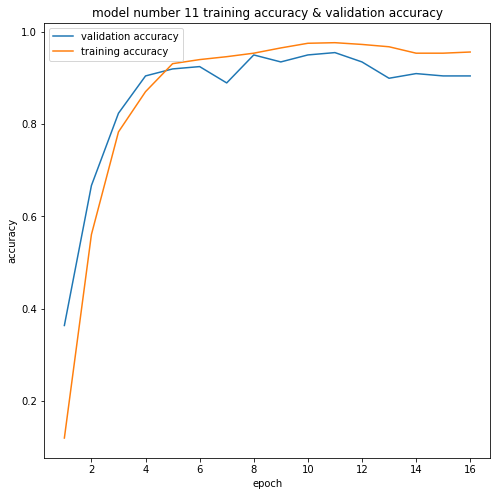

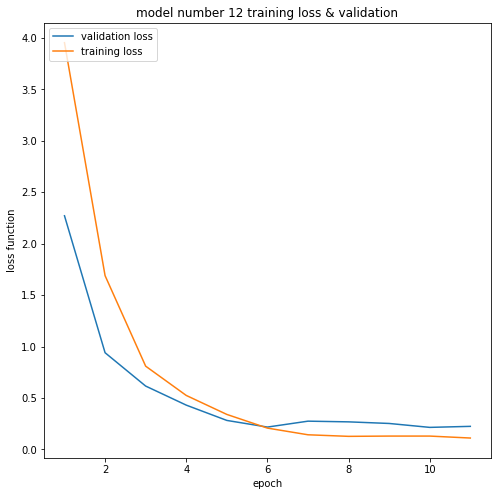

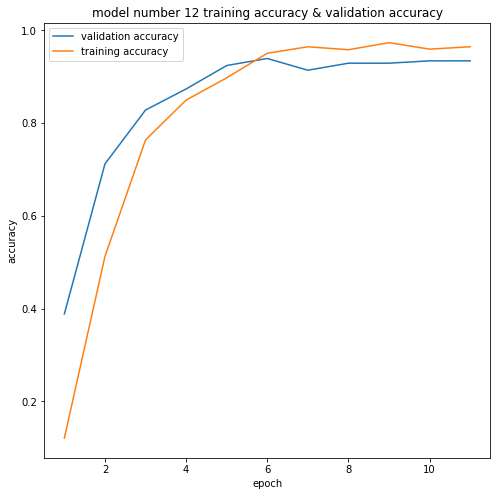

7/7 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.9343


In [57]:
models = createBest_12Models(best_hps)
train_all_models(models)
avg_training_loss_1, avg_validation_loss_1, avg_training_accuracy_1, avg_validation_accuracy_1 = evaluate_model(models,X_train,X_test,y_train,y_test)

In [40]:
print(tuner.get_best_models())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               30880     
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                15939     
                                                                 
Total params: 46,819
Trainable params: 46,819
Non-trainable params: 0
_________________________________________________________________


None


In [61]:
models[6].evaluate(X_test,y_test)[0]

7/7 [==============================] - 0s 5ms/step - loss: 0.0989 - accuracy: 0.9848


0.0988534465432167